<a href="https://colab.research.google.com/github/imguru-mooc/HR_AI/blob/main/notebooks/Gradient_Descent_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Gradient Descent (경사 하강법) 개념 정리

## ✅ Gradient Descent란?
- 함수의 최솟값을 찾는 최적화 알고리즘입니다.
- 머신러닝에서는 모델의 비용 함수(cost function)를 최소화하는 파라미터(가중치)를 찾을 때 사용합니다.

---

## ✅ 수식으로 표현

- 경사 하강법 공식:

$$
\theta = \theta - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta}
$$

- 의미:
  - $\theta$: 파라미터 (예: 가중치)
  - $\alpha$: 학습률 (Learning Rate)
  - $\frac{\partial J(\theta)}{\partial \theta}$: 비용 함수 $J(\theta)$에 대한 미분값 (그래디언트)

- 동작 방식:
  - 현재 위치에서 비용 함수의 기울기(경사)를 따라 **반대 방향으로 이동**
  - 반복적으로 이동하며 비용 함수를 최소화

---

## ✅ 직관적 이해
- 산 위에 있는 사람이 가장 낮은 지점(골짜기)로 내려가는 과정과 유사
- 현재 위치의 경사를 계산해서 낮은 방향으로 조금씩 이동

---

## ✅ 하이퍼파라미터: 학습률 (Learning Rate)
- 학습률 $\alpha$는 한 번의 업데이트에서 이동하는 크기
- 너무 작으면 → 학습이 느림
- 너무 크면 → 발산하거나 최솟값을 지나쳐서 수렴 실패

---

## ✅ Gradient Descent의 종류
1. **Batch Gradient Descent**
   - 전체 데이터를 사용해서 기울기 계산
   - 정확하지만 계산이 느림
2. **Stochastic Gradient Descent (SGD)**
   - 데이터 한 개씩 기울기 계산
   - 빠르고 가볍지만 불안정
3. **Mini-batch Gradient Descent**
   - 일부 데이터 묶음(Batch)으로 계산
   - 실무에서 가장 많이 사용

---

## ✅ 머신러닝에서의 활용
- 선형 회귀, 로지스틱 회귀, 신경망 등 대부분의 머신러닝 모델에서 비용 함수 최적화에 사용됨
- 경사 하강법이 잘 동작하기 위해서:
  - 적절한 학습률 선택
  - 비용 함수가 미분 가능해야 함

---

## ✅ 시각적 요약
- 반복적으로 비용 함수의 경사를 따라 내려가면서 최적의 파라미터를 찾는 과정
- 비용 함수 값은 반복 횟수에 따라 점점 줄어듦

---


# Gradient Descent 실습

기본적인 경사 하강법(Gradient Descent)을 이용한 선형 회귀 실습입니다.

In [ ]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

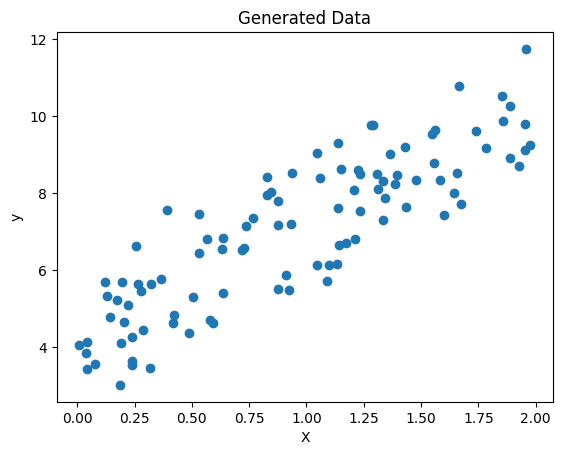

In [ ]:
# 데이터 생성 (y = 4 + 3x + 노이즈)
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

In [ ]:
# 비용 함수 (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

In [ ]:
# 경사 하강법 함수
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        gradients = (1/m) * X.T.dot(error)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
# 데이터 준비 (bias term 추가)
X_b = np.c_[np.ones((100, 1)), X]
theta = np.random.randn(2, 1)  # 초기 가중치 (랜덤)

In [ ]:
# 하이퍼파라미터 설정 및 Gradient Descent 실행
learning_rate = 0.1
iterations = 100

theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print("최종 파라미터 (theta):")
print(theta_final)

최종 파라미터 (theta):
[[4.1424076 ]
 [3.03922626]]


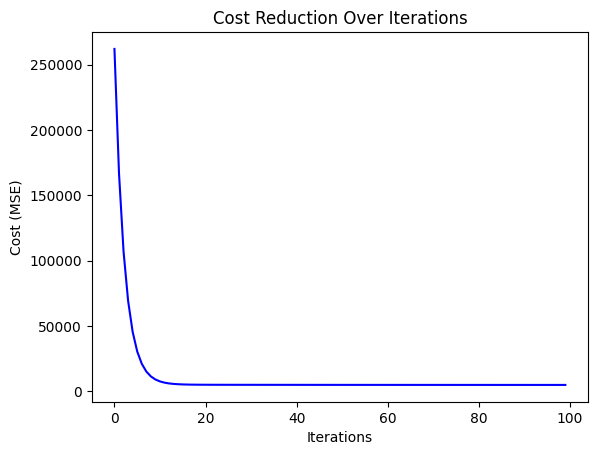

In [ ]:
# 비용 함수 시각화
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Iterations")
plt.show()

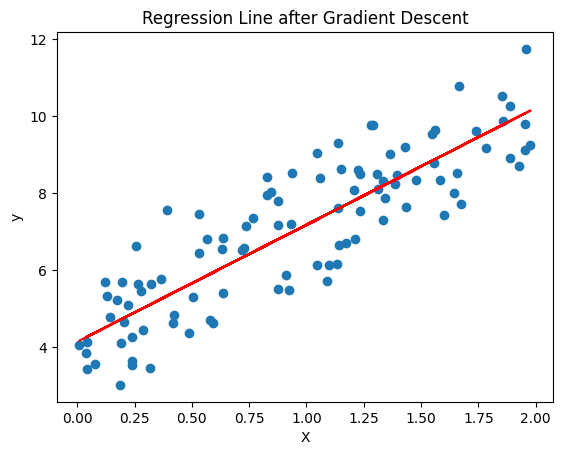

In [ ]:
# 회귀선 시각화
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_final), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression Line after Gradient Descent")
plt.show()

### MSE 손실 함수 그래프

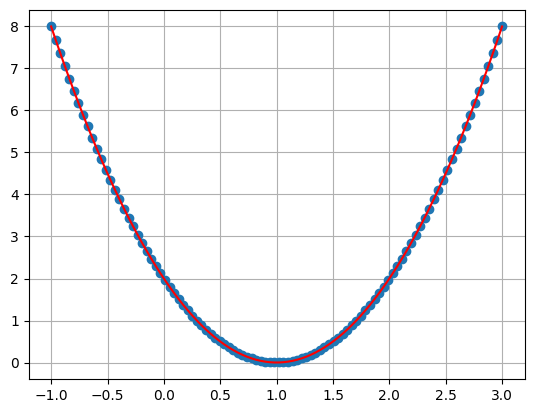

In [ ]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = np.linspace(-1,3,100)
b = 0
x = 2
y = 2

j = np.zeros(100)

for i in range(len(w)):
    y_hat = w[i]*x + b;
    j[i] = 0.5 * (y_hat - y)**2

plt.plot(w,j, 'o' )
plt.plot(w,j, 'r-' )

plt.grid(True)
plt.show()

### 경사 하강법 시각화

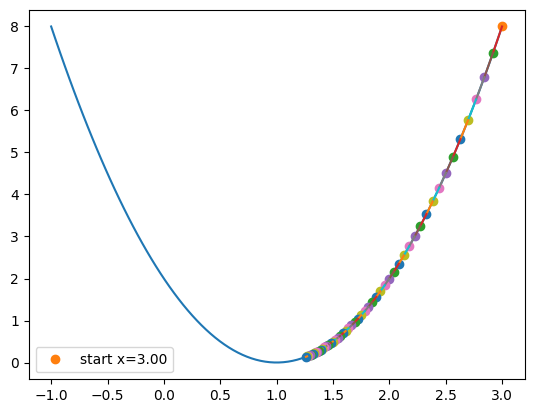

In [ ]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(x) : # A parabola
    f = 0.5*(2-x*2)**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*(2-x*2)
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()

plot_steps(3, 0.01, 50)

### 학습 과정 실제 그래프 (weight, bias 둘다 학습)

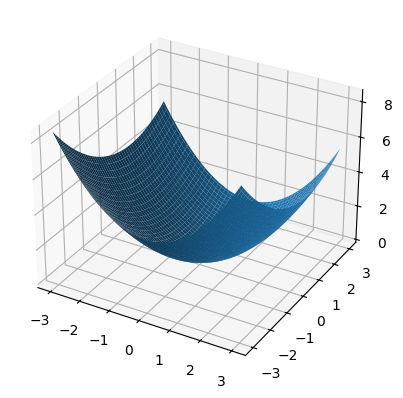

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

def pprint(arr):
    print("type:{}".format(type(arr)))
    print("shape: {}, dimension: {}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    print("Array's Data:\n", arr)

# The function J
def J(a0, a1, x, y, m):
    ret=0
    for i in range(m):
        ret += 0.5*((a0 + a1*x[i]) - y[i] )**2
    return ret/m

x = np.linspace(-1,1,5)
y = x

a0 = np.linspace(-3,3,100)
a1 = np.linspace(-3,3,100)

aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))

plt.show()

### 실전 데이터를 이용한 선형회귀

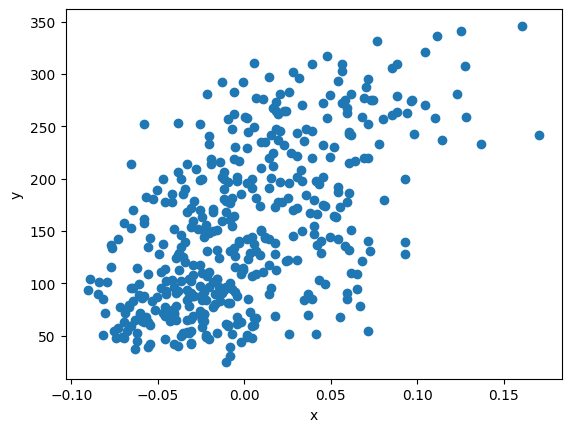

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt
x = diabetes.data[:, 2]
y = diabetes.target

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

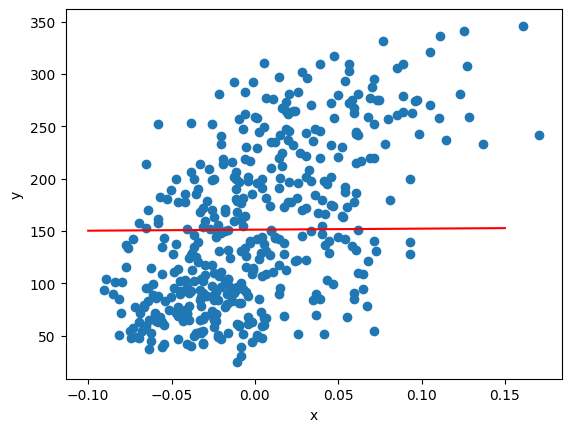

In [ ]:
w = 1.0
b = 1.0
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_hat - y_i
    rate = 0.01
    w = w - rate * err * x_i
    b = b - rate * err

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

942.7009346255027
151.74608124777322


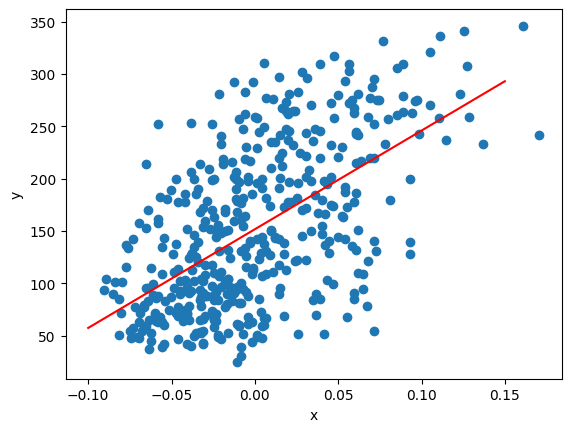

In [ ]:
w = 1.0
b = 1.0
for i in range(1, 1000):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_hat - y_i
        rate = 0.01
        w = w - rate * err * x_i
        b = b - rate * err
plt.scatter(x, y)
print(w)
print(b)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 학습된 파라메터를 이용한 값 예측

In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

321.4322494803637


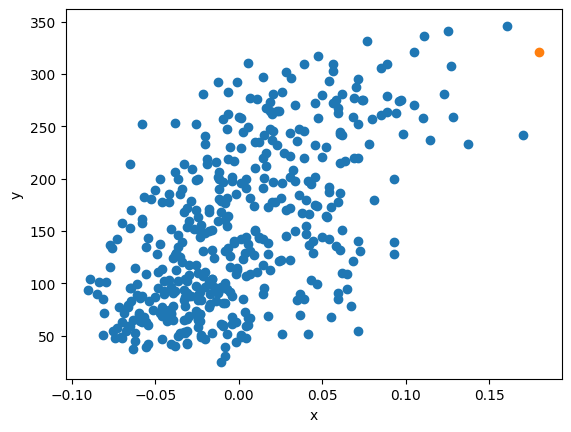

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 머신러닝  vs  딥러닝  시연

[playground.tensorflow.org](http://playground.tensorflow.org)

## 합성공 신경망(CNN)  시연


[ConvNetJS CIFAR-10 demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)

## 트랜스 포머 모델(Transformer) 시연

<img src="https://i.namu.wiki/i/VbGh4H2AXMcaQ0Nr8_PxYKyJa8X_FHrQo2jJuITdAWPuJl1QMQpKLhSgxArftKvWDsItPkJ4ewjiNfB-_s2A_TlTDUZOj2GGN3XRXnH8cUybraxqqkhZCi6vGepqbaLpv9HXG_ecdkkMBHimdcGYAA.webp" alt="설명" width="400"/>

[Transformer 시연](https://poloclub.github.io/transformer-explainer/)

## GPT3 시연

[GPT3 시연](https://bbycroft.net/llm)